In [3]:
#--------------------------------------
# Função que monta o circuito de Deutsch
# usando 1 registros clássico no medidor
#--------------------------------------
def DEUTSCH_CNOT():
    from qiskit import QuantumRegister
    from qiskit import ClassicalRegister
    from qiskit import QuantumCircuit
#-----------------
    Q  = QuantumRegister(  2, name = 'q')
    C  = ClassicalRegister(1, name = 'c')
    QC = QuantumCircuit(Q, C, name = "DEUTSCH")
#-----------------
    QC.x(Q[0])
    QC.barrier()
    QC.h(Q)
    QC.cx(Q[1], Q[0])
    QC.h(Q[1])
    QC.measure(Q[1],C[0])
    print('DEUTSCH(): FUNCIONA!')
    return QC

#--------------------------------------
# Função que monta o circuito de Deutsch
# usando 2 registros clássico no medidor
#--------------------------------------
def DEUTSCH_CNOT_2():
    from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
#-----------------
    Q  = QuantumRegister(  2, name = 'q')
    C  = ClassicalRegister(2, name = 'c')
    QC = QuantumCircuit(Q, C, name = "DEUTSCH_CNOT_2")
#-----------------
    QC.x(Q[0])
    QC.barrier()
    QC.h(Q)
    QC.cx(Q[1], Q[0])
    QC.h(Q[1])
    QC.measure(Q,C)
    print('DEUTSCH_CNOT_2(): FUNCIONA!')
    return QC

In [4]:
# Executando as funções
QC_DEUTSCH   = DEUTSCH_CNOT()
QC_DEUTSCH_2 = DEUTSCH_CNOT_2()

DEUTSCH(): FUNCIONA!
DEUTSCH_CNOT_2(): FUNCIONA!


### Desenhando os circuitos

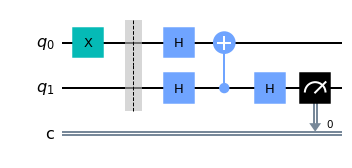

In [5]:
QC_DEUTSCH.draw(output='mpl')

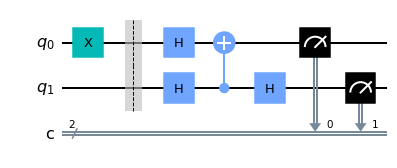

In [6]:
QC_DEUTSCH_2.draw(output='mpl')

In [7]:
#------------------------------------------------------------------------
# FUNCAO PARA CRIAR O HISTOGRAMA:
#------------------------------------------------------------------------
def PLOT_HISTOGRAMS( DATA, LEGEND ):
    from qiskit.tools.visualization import plot_histogram
    HIST = plot_histogram( DATA, legend = LEGEND, bar_labels = True, figsize = (7, 5))
    display(HIST)
    return None

In [8]:
#------------------------------------------------------------------------
# FUNCAO QUE EXECUTA O CIRCUITO NA MAQUINA LOCAL:
#------------------------------------------------------------------------
def SIMULADOR_LOCAL(QC, N_SHOTS, BACKEND_NAME):
    from qiskit  import Aer
    from qiskit  import execute
#--------------
    F_NAME = '\'SIMULADOR_LOCAL()\''
    BACKEND = Aer.get_backend(BACKEND_NAME)
#-----------------------------------------------------------------------
    EXP = execute(QC, BACKEND, shots=N_SHOTS)
    RESULT = EXP.result()
    print(' RESULTS:')
    print('   backend_name:', RESULT.backend_name, end =' |')
    print('   status:',       RESULT.status, end =' |')
    print('   success:',      RESULT.success)
    print('   get_counts():', RESULT.get_counts() )
#-----------------------------------------------------------------------
    print(' ---------- FIM DA FUNCAO %s---------- '% F_NAME)
    return RESULT.get_counts()

 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'1': 8192}
 ---------- FIM DA FUNCAO 'SIMULADOR_LOCAL()'---------- 
 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'10': 4096, '11': 4096}
 ---------- FIM DA FUNCAO 'SIMULADOR_LOCAL()'---------- 


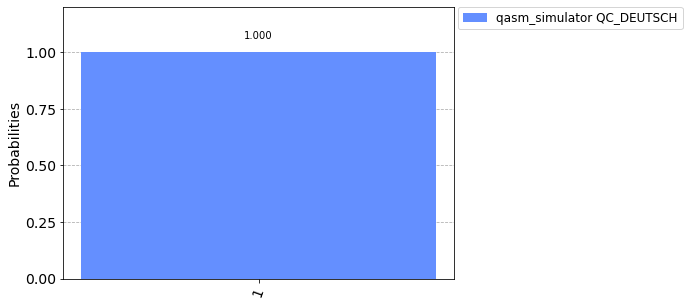

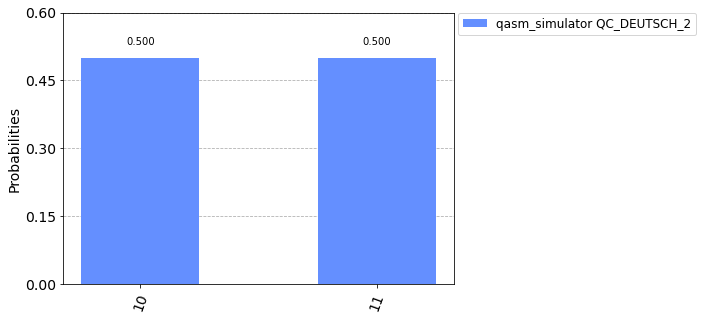

In [9]:
# EXECUTANDO/SIMULANDO O CIRCUITO

N_SHOTS = 2**(13)
BACKEND_NAME = "qasm_simulator"

DADOS_1 = SIMULADOR_LOCAL(QC_DEUTSCH  , N_SHOTS, BACKEND_NAME)
DADOS_2 = SIMULADOR_LOCAL(QC_DEUTSCH_2, N_SHOTS, BACKEND_NAME)

PLOT_HISTOGRAMS( [DADOS_1],  [BACKEND_NAME+' QC_DEUTSCH'] )
PLOT_HISTOGRAMS( [DADOS_2],  [BACKEND_NAME+' QC_DEUTSCH_2'] )